In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import utils
from sklearn import preprocessing
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import utils
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv and loading it
dataset=pd.read_csv("RTA Dataset.csv")

In [3]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


1 - Data Cleaning

In [4]:
#checking missing values
dataset.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [5]:
#dropping columns with high number of missing values
dataset.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality'], axis = 1, inplace = True)

In [6]:
dataset.isna().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [7]:
categorical = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']
print('The categorical variables are',categorical)

The categorical variables are ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [8]:
#for categorical values we can replace the null values with Unknown
for i in categorical:
    dataset[i].fillna('Unknown',inplace=True)

In [9]:
#now no null values should be in cols
dataset.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [10]:
#checking col driving experience
dataset['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [11]:
for index, row in dataset.loc[:, ['Driving_experience']].iterrows():
    if(row['Driving_experience']=='unknown'):
        dataset.loc[index, 'Driving_experience'] = 'Unknown'

In [12]:
#removed small case unknowns
dataset['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr'], dtype=object)

In [13]:
#checking col Type_of_vehicle
dataset['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', 'Unknown',
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [14]:
#cleaning type of vehicle column
for index, row in dataset.loc[:, ['Type_of_vehicle']].iterrows():
    if(row['Type_of_vehicle']=='Public (> 45 seats)' or row['Type_of_vehicle']=='Public (12 seats)' or row['Type_of_vehicle']=='Public (13?45 seats)'):
        dataset.loc[index, 'Type_of_vehicle'] = 'Public'
    if(row['Type_of_vehicle']=='Lorry (41?100Q)' or row['Type_of_vehicle']=='Lorry (11?40Q)' or row['Type_of_vehicle']=='Long lorry'):
        dataset.loc[index, 'Type_of_vehicle'] = 'Lorry'

In [15]:
dataset['Type_of_vehicle'].unique()

array(['Automobile', 'Public', 'Lorry', 'Unknown', 'Taxi',
       'Pick up upto 10Q', 'Stationwagen', 'Ridden horse', 'Other',
       'Bajaj', 'Turbo', 'Motorcycle', 'Special vehicle', 'Bicycle'],
      dtype=object)

In [16]:
#cleaning keyword na from rows to Unknown
for col in dataset.columns:
    for index, row in dataset.loc[:, [col]].iterrows():
        if(row[col]=='na'):
            dataset.loc[index, col] = 'Unknown'

In [17]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,Office areas,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,Industrial areas,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury


In [18]:
# convert object type column into datetime datatype column
dataset['Time'] = pd.to_datetime(dataset['Time'])

In [19]:
dataframe = dataset.copy()
dataframe['Hour_of_Day'] = dataframe['Time'].dt.hour
dataframe = dataframe.drop('Time', axis=1)
dataframe.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,Unknown,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,Office areas,Undivided Two way,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,Recreational areas,other,...,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,Office areas,other,...,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,Industrial areas,other,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,1


2 - Data Exploration

In [20]:
#Target Variable Classification
print(dataframe['Accident_severity'].value_counts())

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<AxesSubplot: xlabel='Accident_severity'>

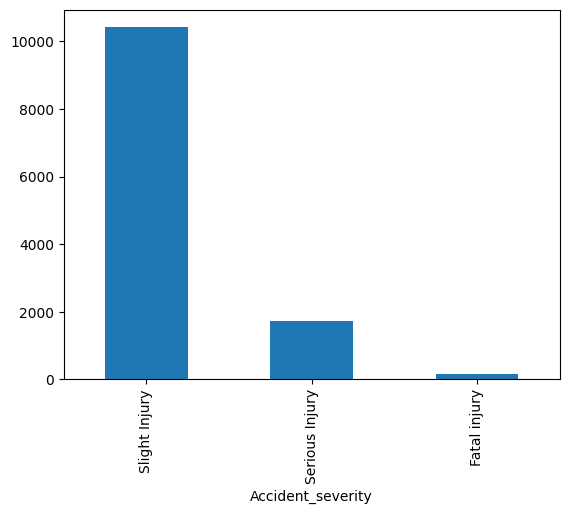

In [21]:
dataframe['Accident_severity'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Educational_level'>

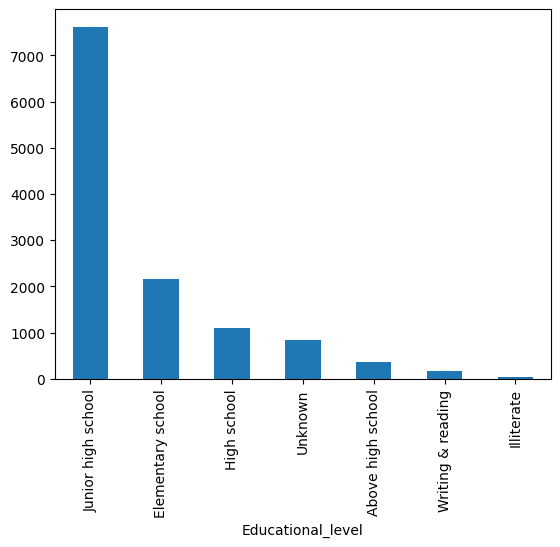

In [22]:
dataframe['Educational_level'].value_counts().plot(kind='bar')

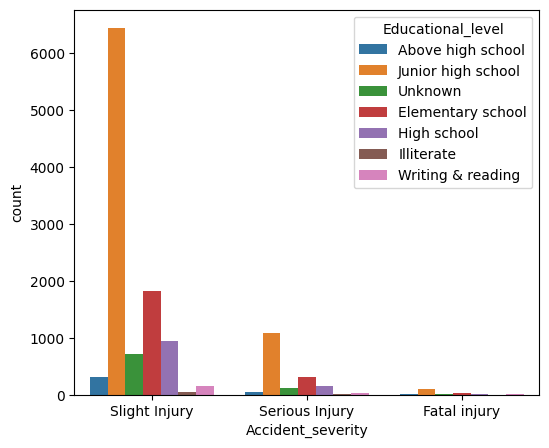

In [23]:
# Educational level with accident severity
plt.figure(figsize=(6,5))
sns.countplot(x='Accident_severity', data=dataframe,  hue="Educational_level")
plt.xticks(rotation=0)
plt.show()

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Unknown                               172
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

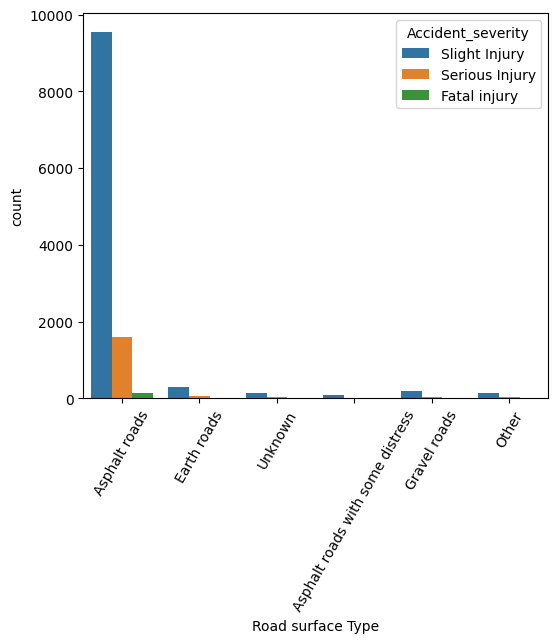

In [24]:
# Road Surface type with accident severity
print(dataframe['Road_surface_type'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=dataframe)
plt.xlabel('Road surface Type')
plt.xticks(rotation=60)
plt.show

Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

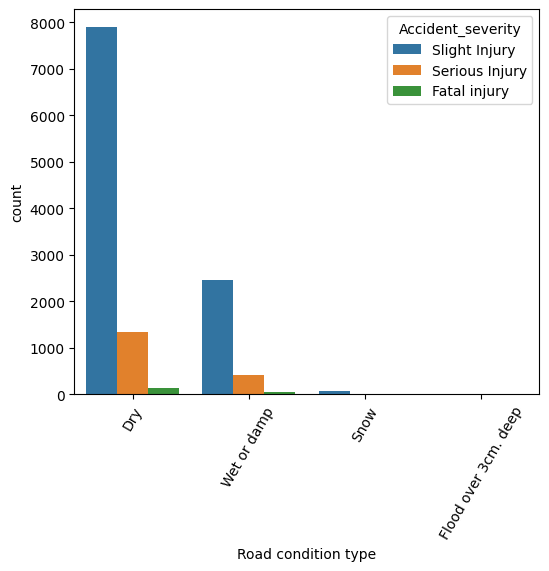

In [25]:
# Road Surface conditions with accident severity
print(dataframe['Road_surface_conditions'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_conditions', hue='Accident_severity', data=dataframe)
plt.xlabel('Road condition type')
plt.xticks(rotation=60)
plt.show

In [26]:
#data values for road surface type
dataframe_pivot_table = pd.pivot_table(data=dataframe, 
               index='Road_surface_conditions', 
               columns='Accident_severity',
               aggfunc='count')
road_surface_df = dataframe_pivot_table['Road_surface_type']
road_surface_df.fillna(0, inplace=True)
road_surface_df['sum of injuries'] = road_surface_df['Fatal injury'] + road_surface_df['Serious Injury'] + road_surface_df['Slight Injury']
road_surface_df


Accident_severity,Fatal injury,Serious Injury,Slight Injury,sum of injuries
Road_surface_conditions,,,,
Dry,121.0,1332.0,7887.0,9340.0
Flood over 3cm. deep,0.0,0.0,2.0,2.0
Snow,0.0,4.0,66.0,70.0
Wet or damp,37.0,407.0,2460.0,2904.0


Data Visualization for all categorical cols

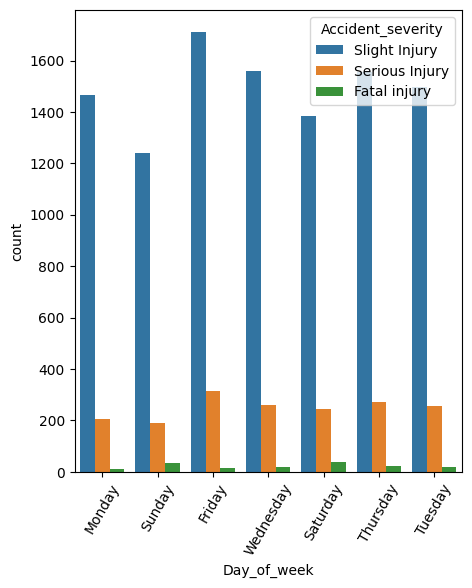

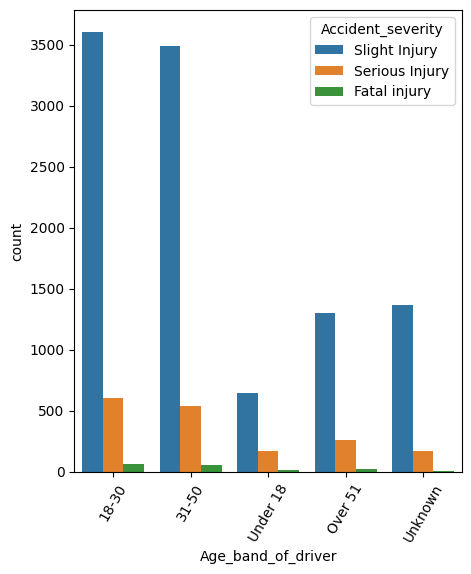

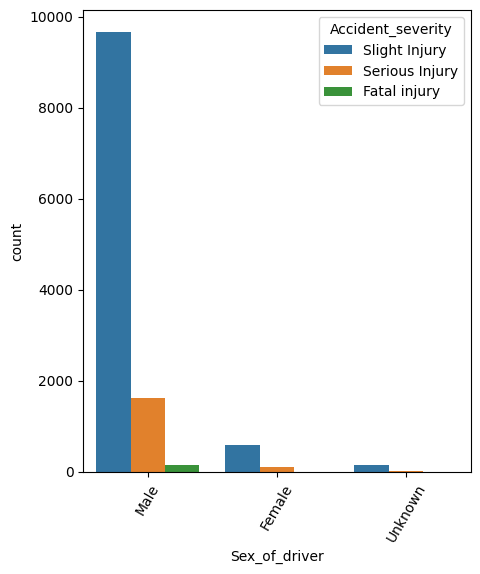

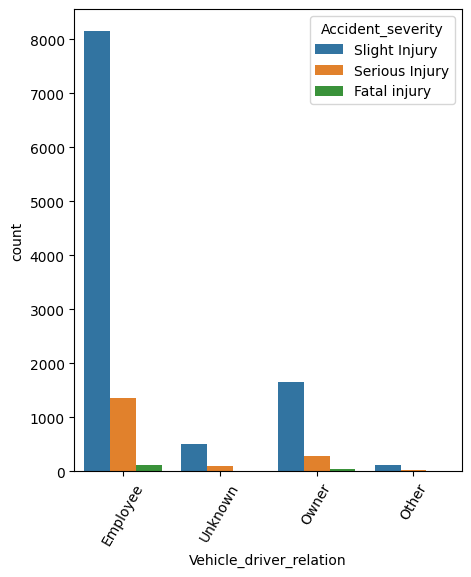

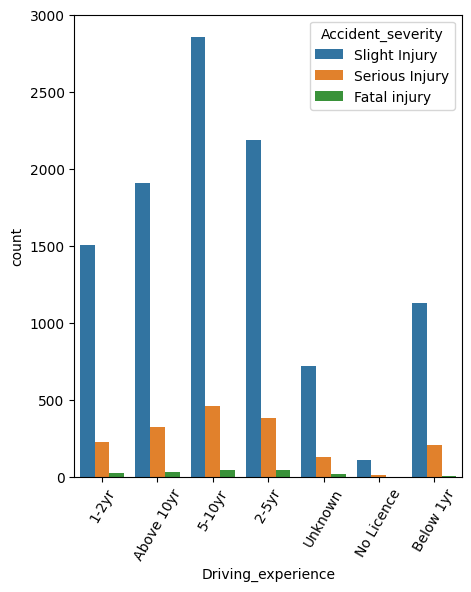

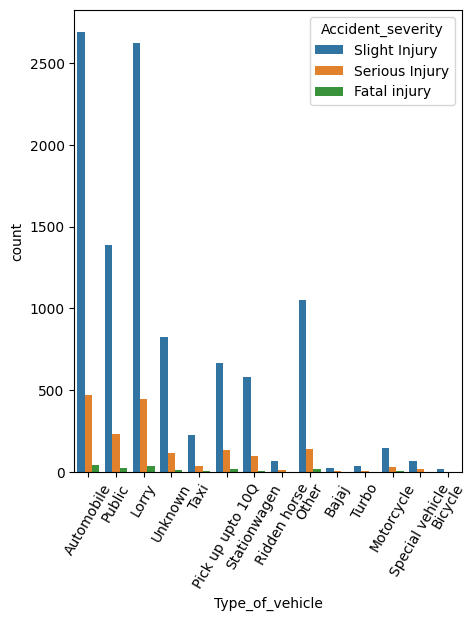

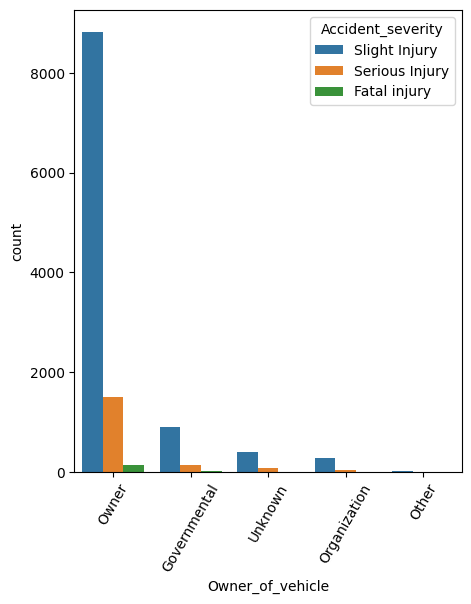

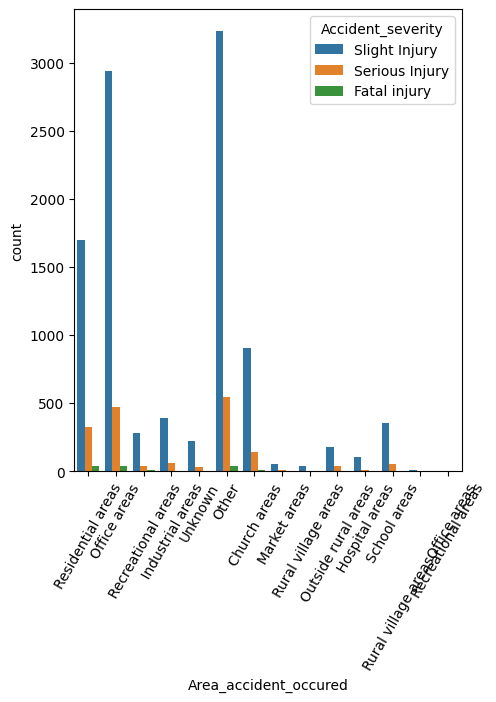

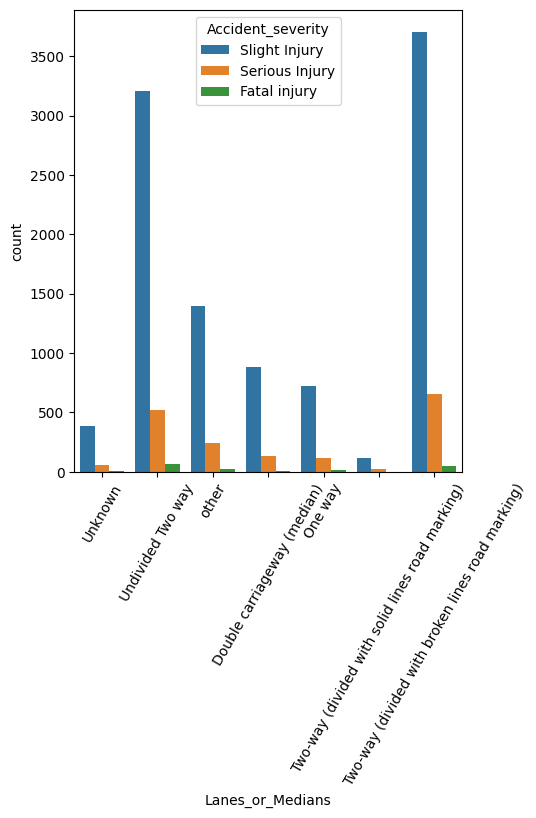

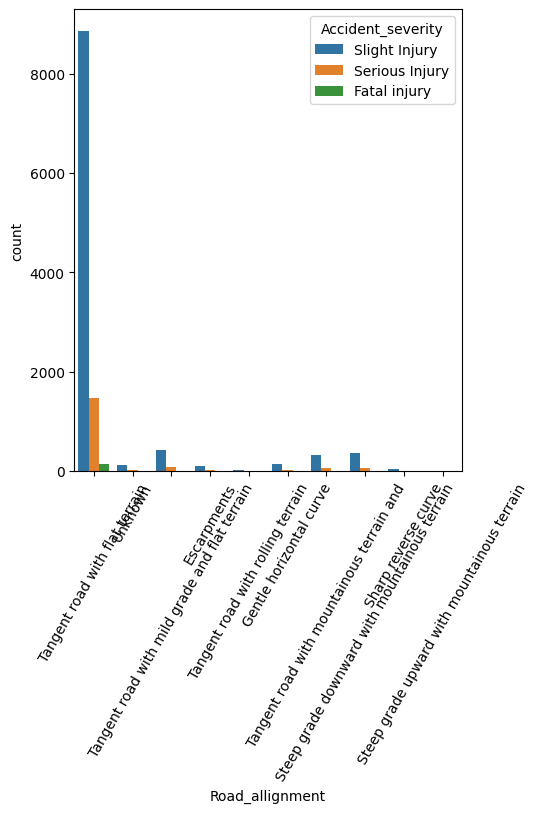

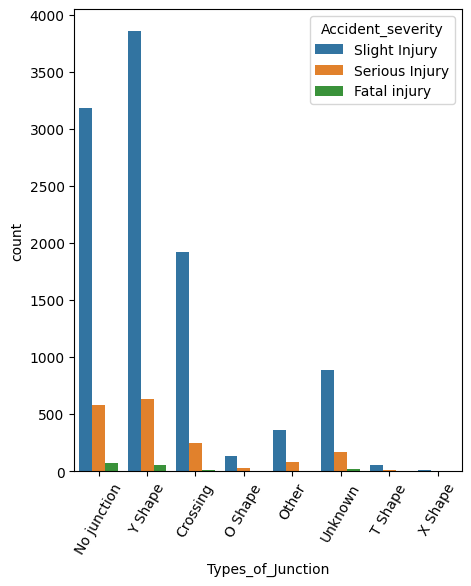

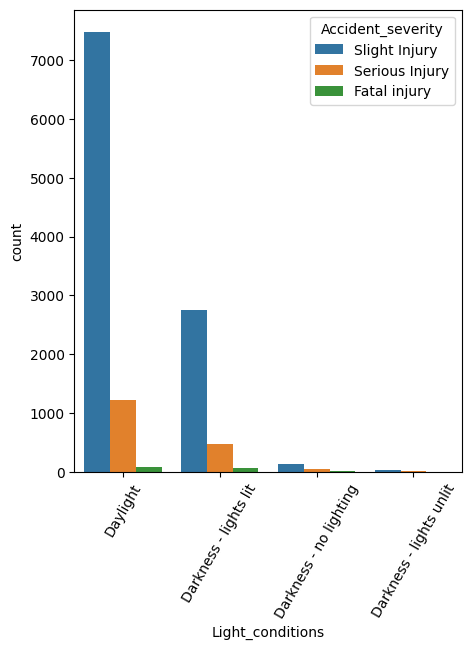

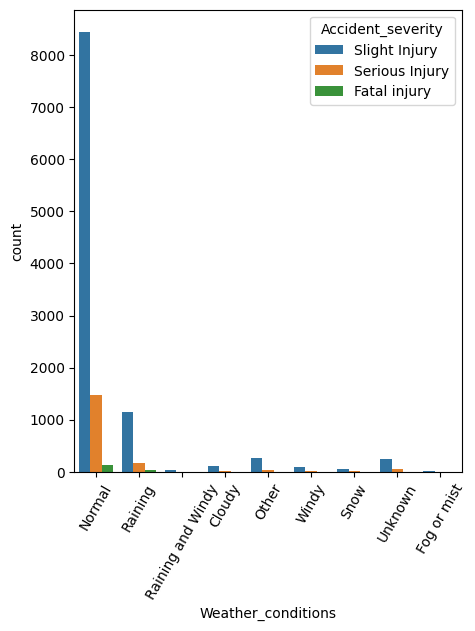

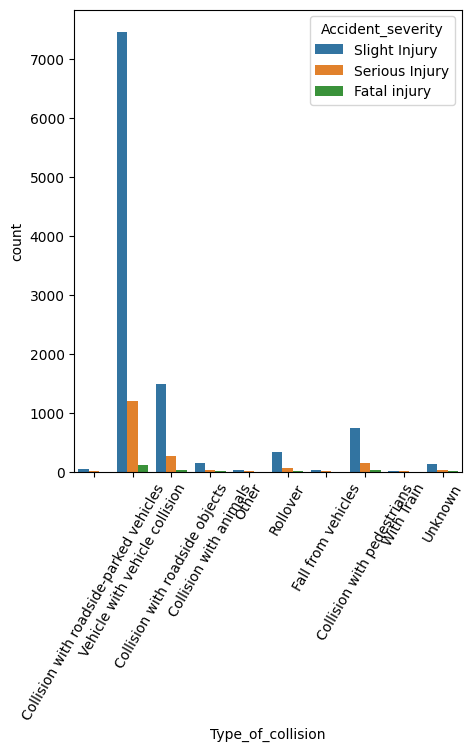

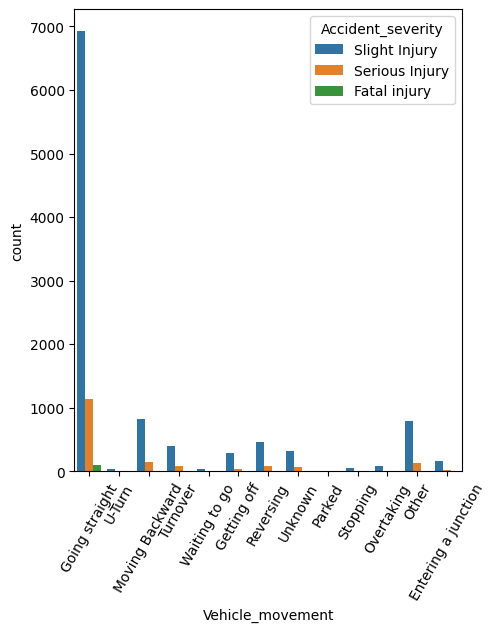

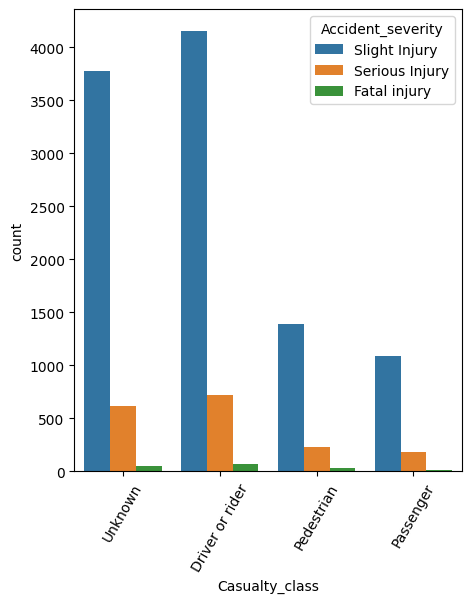

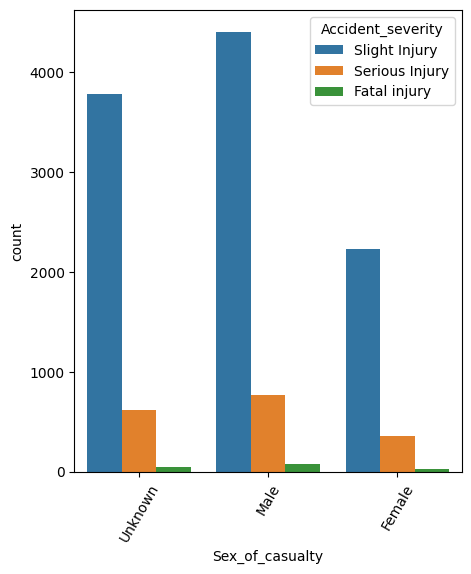

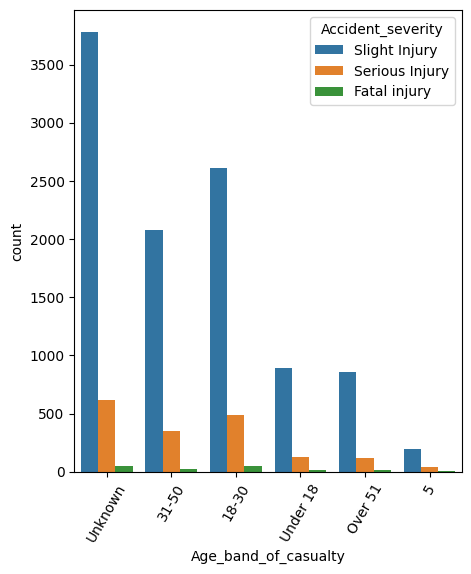

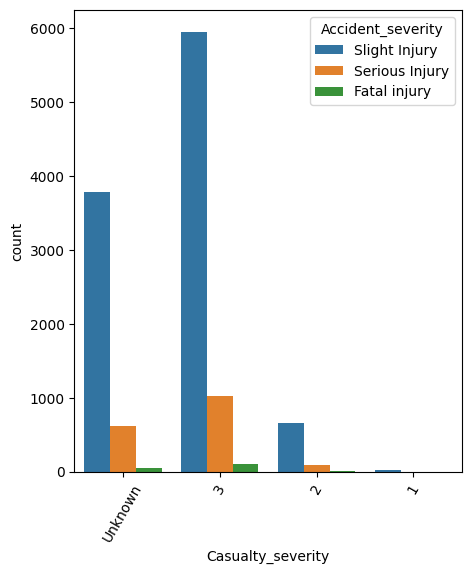

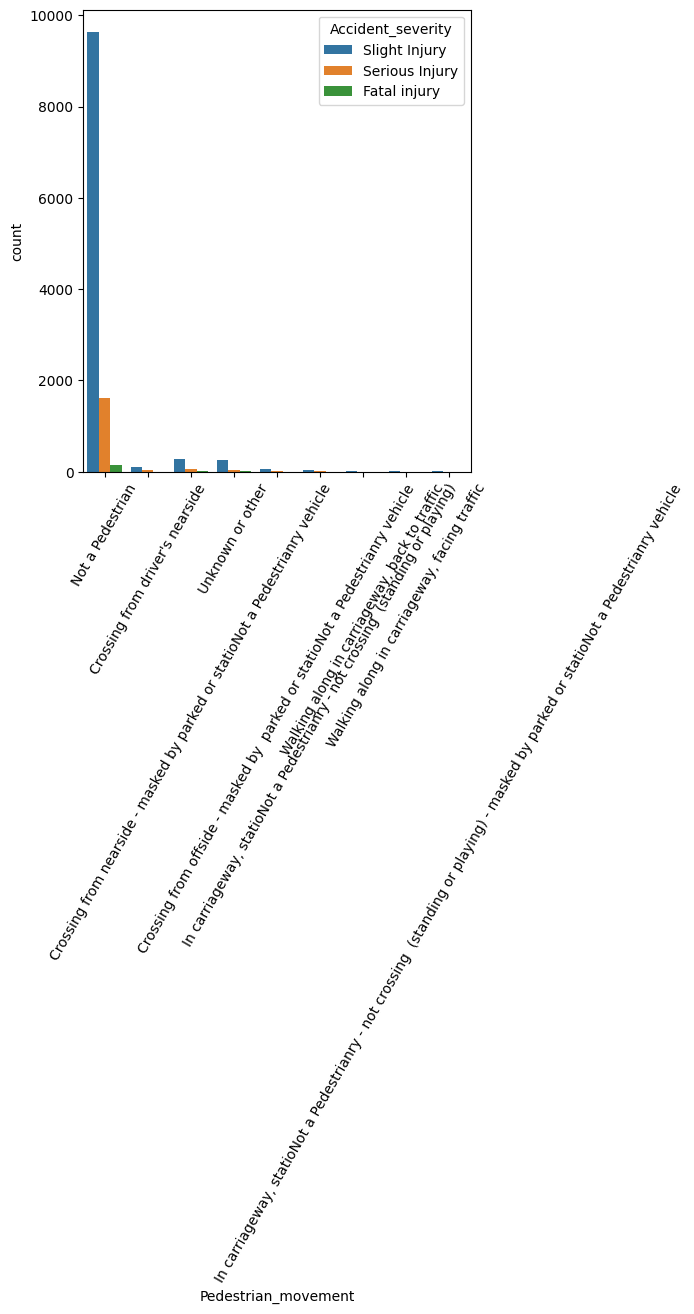

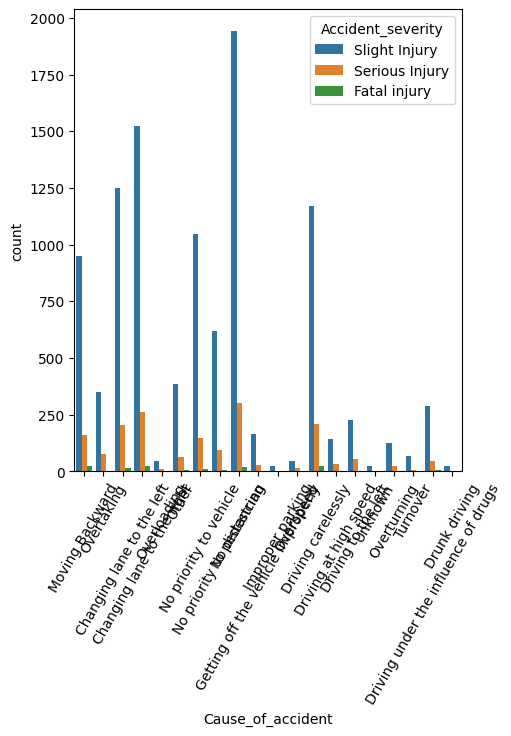

In [27]:
def countPlots(col):
    dataframe[col].value_counts()
    plt.figure(figsize=(5,6))
    sns.countplot(x=col, hue='Accident_severity', data=dataframe)
    plt.xlabel(f'{col}')
    plt.xticks(rotation=60)
    plt.show

#using categorical array from above
for col in categorical:
    #excluding road surface , road conditions, Accident_severity and education level as already visualized above
    if(col!='Road_surface_type' and col!='Road_surface_conditions' and col!='Educational_level' and col!='Accident_severity'):
        countPlots(col)


<Figure size 500x500 with 0 Axes>

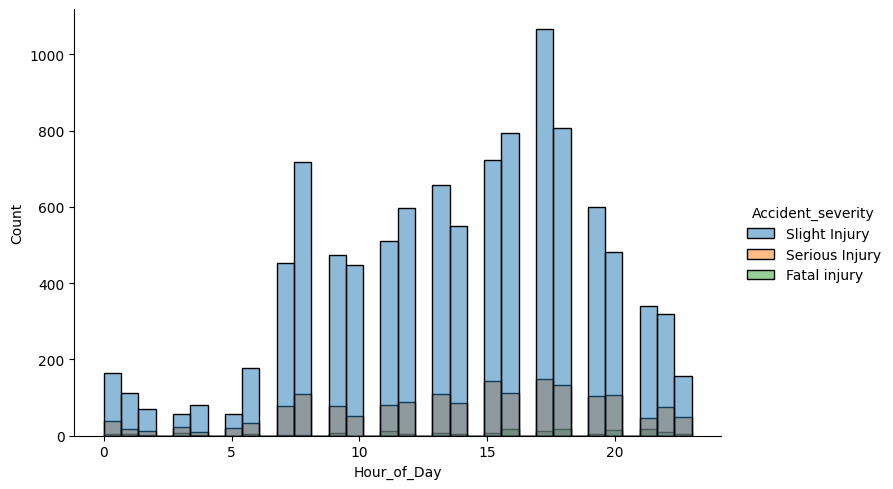

In [28]:
# disribution for hour of the day
plt.figure(figsize=(5,5))
sns.displot(x='Hour_of_Day', hue='Accident_severity', data=dataframe, aspect=1.5)
plt.show()

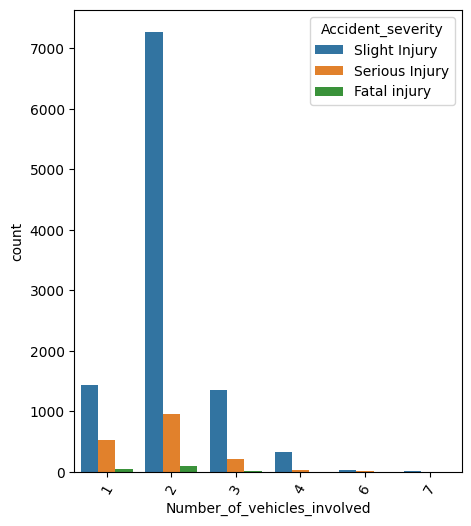

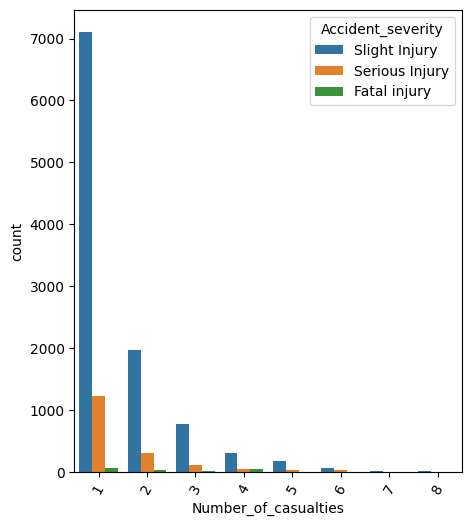

In [29]:
#Visulizing numerical cols wrt to accident severity
numerical_cols = ["Number_of_vehicles_involved", 'Number_of_casualties']

#using categorical array from above
for col in numerical_cols:
    countPlots(col)



<AxesSubplot: >

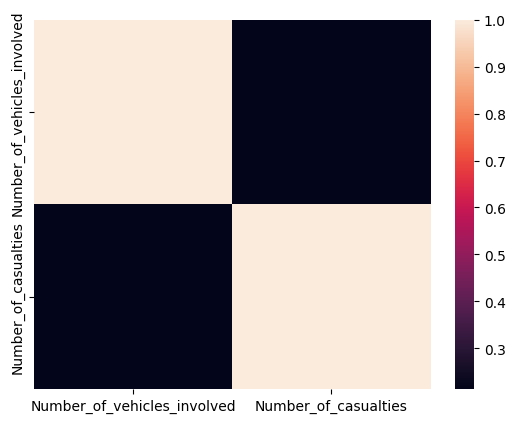

In [30]:
# showing relationship between number of vehicles and number of casualties
numerical_df = dataset.filter(["Number_of_vehicles_involved", 'Number_of_casualties'], axis=1)
sns.heatmap(numerical_df.corr())

# there seems to be no relationship between these two

1) Data is highly imbalanced
2) Hour of day seems to be important to predict accident severity
3) categorical cols need to be encoded
4) chi square analysis need to be done for feature selection

3 - Feature Selection

In [31]:
#selecting all categorical variables as features
features = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Hour_of_Day']

feature_dataframe = dataframe[features]
target = dataframe['Accident_severity']


In [32]:
#new feature dataframe info
feature_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Day_of_week              12316 non-null  object
 1   Age_band_of_driver       12316 non-null  object
 2   Sex_of_driver            12316 non-null  object
 3   Educational_level        12316 non-null  object
 4   Vehicle_driver_relation  12316 non-null  object
 5   Driving_experience       12316 non-null  object
 6   Type_of_vehicle          12316 non-null  object
 7   Owner_of_vehicle         12316 non-null  object
 8   Area_accident_occured    12316 non-null  object
 9   Lanes_or_Medians         12316 non-null  object
 10  Road_allignment          12316 non-null  object
 11  Types_of_Junction        12316 non-null  object
 12  Road_surface_type        12316 non-null  object
 13  Road_surface_conditions  12316 non-null  object
 14  Light_conditions         12316 non-nul

In [33]:
#encoding into dummy variables using get dummies
x = feature_dataframe[features]
y = target
encoded_df = pd.get_dummies(x, dtype='int', drop_first=True)
encoded_df.shape
display(encoded_df)

,Hour_of_Day,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
12312,18,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12313,13,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12314,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#target encoding using label encoder
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(y)
print("Encoded labels:",label_encoder.classes_)
target_en= label_encoder.fit_transform(y)
target_en

# 1: serious injury, 2: Slight injury, 0: Fatal Injury


Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


array([2, 2, 1, ..., 1, 2, 2])

In [35]:
feature_df = pd.concat([encoded_df, numerical_df], axis="columns")
feature_list = list(feature_df.columns)
feature_df

,Hour_of_Day,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,...,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties
0,17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
1,17,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,2,2
2,17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,2,1
12312,18,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
12313,13,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
12314,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1


Modelling


In [36]:
# Imbalance data treatment

oversample = SMOTE()
X_smoted, y_smoted = oversample.fit_resample(feature_df, target_en)
y_smoted = pd.Series(y_smoted)
X_smoted.shape, y_smoted.shape


((31245, 162), (31245,))

In [37]:
y_smoted.value_counts()

2    10415
1    10415
0    10415
Name: count, dtype: int64

<AxesSubplot: ylabel='count'>

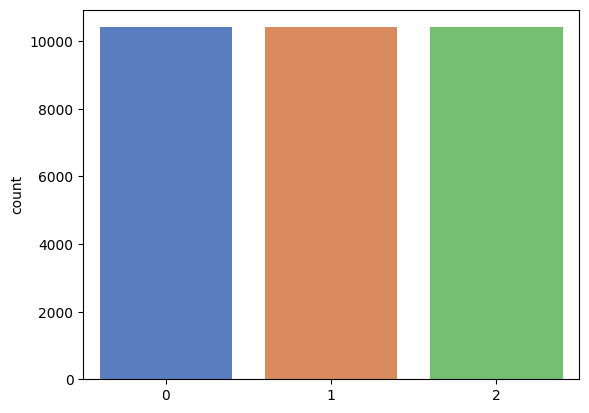

In [38]:
sns.countplot(x = y_smoted, palette='muted')

In [115]:
# train and test split
X_trn, X_tst, y_trn, y_tst = train_test_split(X_smoted, y_smoted, test_size=0.25, random_state=42)

print('Training Features Shape:', X_trn.shape)
print('Training Labels Shape:', y_trn.shape)
print('Testing Featured Shape:', X_tst.shape)
print('Testing Labels Shape:', y_tst.shape)

#to store all models results
models={}


Training Features Shape: (23433, 162)
Training Labels Shape: (23433,)
Testing Featured Shape: (7812, 162)
Testing Labels Shape: (7812,)


In [116]:
def accuracyAndClassif(modelinstance, predics, modelname, printresults ):
    # train score 
    train_score = modelinstance.score(X_trn, y_trn)

    classif_svc = classification_report(y_tst,predics)

    f1score = f1_score(y_tst, predics, average='weighted')
    accuracy = accuracy_score(y_tst, predics, normalize=True, sample_weight=None)
    models[modelname] = {'accuracy':accuracy, 'f1score':f1score}

    if(printresults==True):
        print('train score : ', train_score)
        print(f'f1 score for {modelname}: ',f1score)
        print(f'classification for {modelname}')
        print(classif_svc)


    
    return accuracy, f1score

# modelling using random forest
def randomForestClassifier(X_trn, y_trn, X_tst, y_tst):
    rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
    rf.fit(X_trn, y_trn)
    # predicting on test data
    predics = rf.predict(X_tst)
    accuracyAndClassif(rf, predics, 'RandomForestClassifier', True )
    return rf

rf = randomForestClassifier(X_trn, y_trn, X_tst, y_tst)

train score :  0.9958605385567362
f1 score for RandomForestClassifier:  0.938144659929045
classification for RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2599
           1       0.96      0.87      0.91      2639
           2       0.87      0.96      0.92      2574

    accuracy                           0.94      7812
   macro avg       0.94      0.94      0.94      7812
weighted avg       0.94      0.94      0.94      7812



In [117]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Feature: Hour_of_Day          Importance: 0.069
Feature: Number_of_casualties Importance: 0.066
Feature: Number_of_vehicles_involved Importance: 0.048
Feature: Light_conditions_Daylight Importance: 0.028
Feature: Vehicle_movement_Going straight Importance: 0.021
Feature: Area_accident_occured_Other Importance: 0.02
Feature: Lanes_or_Medians_Two-way (divided with broken lines road marking) Importance: 0.02
Feature: Driving_experience_5-10yr Importance: 0.019
Feature: Type_of_collision_Vehicle with vehicle collision Importance: 0.019
Feature: Cause_of_accident_No distancing Importance: 0.019
Feature: Educational_level_Junior high school Importance: 0.018
Feature: Type_of_vehicle_Lorry Importance: 0.018
Feature: Area_accident_occured_Office areas Importance: 0.018
Feature: Age_band_of_driver_31-50 Importance: 0.017
Feature: Age_band_of_driver_Unknown Importance: 0.017
Feature: Types_of_Junction_Y Shape Importance: 0.016
Feature: Road_surface_conditions_Wet or damp Importance: 0.016
Featur

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [118]:
#selecting features based on random forest classifier importance
feature_scores = pd.Series(rf.feature_importances_, index=X_trn.columns).sort_values(ascending=False)

feature_scores_selected=feature_scores.loc[lambda x : (x >= 0.001)]
rf_features_selected = feature_scores_selected.index.values


print(rf_features_selected)
print('total features selected',len(rf_features_selected))


['Hour_of_Day' 'Number_of_casualties' 'Number_of_vehicles_involved'
 'Light_conditions_Daylight' 'Vehicle_movement_Going straight'
 'Lanes_or_Medians_Two-way (divided with broken lines road marking)'
 'Area_accident_occured_Other' 'Cause_of_accident_No distancing'
 'Type_of_collision_Vehicle with vehicle collision'
 'Driving_experience_5-10yr' 'Area_accident_occured_Office areas'
 'Educational_level_Junior high school' 'Type_of_vehicle_Lorry'
 'Age_band_of_driver_Unknown' 'Age_band_of_driver_31-50'
 'Types_of_Junction_Y Shape' 'Road_surface_conditions_Wet or damp'
 'Age_band_of_casualty_31-50' 'Types_of_Junction_No junction'
 'Lanes_or_Medians_Undivided Two way'
 'Road_allignment_Tangent road with flat terrain'
 'Driving_experience_Above 10yr' 'Driving_experience_Below 1yr'
 'Day_of_week_Monday' 'Cause_of_accident_Changing lane to the right'
 'Owner_of_vehicle_Owner' 'Day_of_week_Sunday' 'Driving_experience_2-5yr'
 'Educational_level_Elementary school' 'Casualty_severity_3'
 'Day_of_we

In [105]:
#updating training and test data with only new features
X_trn = X_trn[rf_features_selected]
X_tst = X_tst[rf_features_selected]
randomForestClassifier(X_trn, y_trn, X_tst, y_tst)

train score :  0.9944949430290616
classification for RandomForestClassifier               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2599
           1       0.90      0.88      0.89      2639
           2       0.88      0.90      0.89      2574

    accuracy                           0.92      7812
   macro avg       0.92      0.92      0.92      7812
weighted avg       0.92      0.92      0.92      7812

f1 score for RandomForestClassifier:  0.9239986144165636


RandomForestClassifier(max_depth=20, n_estimators=800, random_state=42)

In [121]:
#implementing knn classfier
def knnClassifier(k, printResults):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trn, y_trn)
    # predicting on test data
    predics = knn.predict(X_tst)

    accuracy, f1score = accuracyAndClassif(knn, predics, 'knnClassifier', printResults)
    print(f'For k={k} accuracy: {accuracy} and f1score : {f1score}')


for k in range(1,30):
    knnClassifier(k, False)


For k=1 accuracy: 0.7924987199180747 and f1score : 0.766516675956564


KeyboardInterrupt: 

In [122]:
#from above we run for k=1 and see detailed results
knnClassifier(1, True)

train score :  0.9997012759783211
f1 score for knnClassifier:  0.766516675956564
classification for knnClassifier
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2599
           1       0.66      0.99      0.79      2639
           2       1.00      0.39      0.56      2574

    accuracy                           0.79      7812
   macro avg       0.85      0.79      0.77      7812
weighted avg       0.85      0.79      0.77      7812

For k=1 accuracy: 0.7924987199180747 and f1score : 0.766516675956564


In [107]:
#ada boost classifier

def adaBoostClassifier():
    ada = AdaBoostClassifier(n_estimators=800, learning_rate=1, random_state=100)
    ada.fit(X_trn, y_trn)

    # predicting on test data
    predics = ada.predict(X_tst)

    accuracyAndClassif(ada, predics, 'AdaBoostClassifier', True)

adaBoostClassifier()

train score :  0.7055007894849145
classification for AdaBoostClassifier               precision    recall  f1-score   support

           0       0.74      0.76      0.75      2599
           1       0.61      0.60      0.60      2639
           2       0.78      0.77      0.78      2574

    accuracy                           0.71      7812
   macro avg       0.71      0.71      0.71      7812
weighted avg       0.71      0.71      0.71      7812

f1 score for AdaBoostClassifier:  0.7087421751113547


In [123]:
#gradient boosting classifier

def gradientBoostingClassifier():
    gbc = GradientBoostingClassifier(n_estimators=1000, learning_rate=1, random_state=100)
    gbc.fit(X_trn, y_trn)
    # predicting on test data
    predics = gbc.predict(X_tst)

    accuracyAndClassif(gbc, predics, 'GradientBoostingClassifier', True)

gradientBoostingClassifier()

train score :  0.9893312849400419
f1 score for GradientBoostingClassifier:  0.9068051961267317
classification for GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2599
           1       0.90      0.85      0.87      2639
           2       0.85      0.89      0.87      2574

    accuracy                           0.91      7812
   macro avg       0.91      0.91      0.91      7812
weighted avg       0.91      0.91      0.91      7812



In [125]:
#naive bayes

def naiveBayesModel():
    nb=MultinomialNB()
    nb.fit(X_trn, y_trn)
    # predicting on test data
    predics = nb.predict(X_tst)

    accuracyAndClassif(nb, predics, 'NaiveBayesModel', True)

naiveBayesModel()

train score :  0.7286305637349038
f1 score for NaiveBayesModel:  0.7273020822680054
classification for NaiveBayesModel
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      2599
           1       0.64      0.57      0.60      2639
           2       0.79      0.83      0.81      2574

    accuracy                           0.73      7812
   macro avg       0.73      0.73      0.73      7812
weighted avg       0.73      0.73      0.73      7812



In [126]:
#Support vector modelling

def SVM():
    svc=SVC()
    svc.fit(X_trn, y_trn)
    # predicting on test data
    predics = svc.predict(X_tst)

    accuracyAndClassif(svc, predics, 'SupportVectorMachine', True)

SVM()

train score :  0.8326291981393761
f1 score for SupportVectorMachine:  0.8181372540124153
classification for SupportVectorMachine
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2599
           1       0.83      0.63      0.72      2639
           2       0.83      0.98      0.90      2574

    accuracy                           0.82      7812
   macro avg       0.83      0.83      0.82      7812
weighted avg       0.83      0.82      0.82      7812



In [127]:

def DecisionTreeClassifierModel(X_tst):
    dtc_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=20, min_samples_leaf=5)
    dtc_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 20, min_samples_leaf = 5)

    dtc_gini.fit(X_trn, y_trn)
    dtc_entropy.fit(X_trn, y_trn)
    # predicting on test data
    predics_gini = dtc_gini.predict(X_tst)
    predics_entropy = dtc_entropy.predict(X_tst)
    accuracyAndClassif(dtc_gini, predics_gini, 'decision-tree-gini', True)
    accuracyAndClassif(dtc_entropy, predics_entropy, 'decision-tree-entropy', True)

DecisionTreeClassifierModel(X_tst)

train score :  0.8949344940895319
f1 score for decision-tree-gini:  0.8219092906065542
classification for decision-tree-gini
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2599
           1       0.75      0.77      0.76      2639
           2       0.80      0.73      0.76      2574

    accuracy                           0.82      7812
   macro avg       0.82      0.82      0.82      7812
weighted avg       0.82      0.82      0.82      7812

train score :  0.9074382281398028
f1 score for decision-tree-entropy:  0.8379431633344371
classification for decision-tree-entropy
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2599
           1       0.78      0.78      0.78      2639
           2       0.82      0.76      0.79      2574

    accuracy                           0.84      7812
   macro avg       0.84      0.84      0.84      7812
weighted avg       0.84      0.84    

In [128]:
#comparing all models scores

alg=[]
acc=[]
f1scores=[]
for key in models:
    alg.append(key)
    acc.append(models[key]['accuracy'])
    f1scores.append(models[key]['f1score'])

Accuracy_Scores=pd.DataFrame({'Algorithms':alg, 'Accuracy': acc, 'f1scores': f1scores})
Accuracy_Scores.sort_values(by='Accuracy',ascending=False)

,Algorithms,Accuracy,f1scores
0,RandomForestClassifier,0.938172,0.938145
2,GradientBoostingClassifier,0.907066,0.906805
6,decision-tree-entropy,0.840118,0.837943
4,SupportVectorMachine,0.824885,0.818137
5,decision-tree-gini,0.823605,0.821909
1,knnClassifier,0.792499,0.766517
3,NaiveBayesModel,0.730415,0.727302


In [132]:
#cross validation for randomforestclassifier
# cv indocates folds in startifiedKfolds technique
score = cross_val_score(RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42),X_smoted, y_smoted,scoring='accuracy', cv=10)
print(f'score are {score}')
print(f'score mean: {score.mean()}')

score are [0.69728    0.82688    0.97056    0.98304    0.9824     0.9862356
 0.98207426 0.97631242 0.97279129 0.97695262]
score mean: 0.93545261971831
